In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# KoLA Results View

In [52]:
df = pd.read_excel('./data/KoLA/results_view/KoLAdata.xlsx',index_col=0)
df

,r1,r2,r3,r4,h1,h2,h3,h4,r,rr,h,hh,1-h
llm,,,,,,,,,,,,,
baichuan2-13b-base,0.570000,0.511806,0.483139,0.641667,0.73,0.65,0.87,0.55,0.611436,16,0.676991,16,0.323009
baichuan2-13b-chat,0.983333,0.902991,0.916667,0.972222,0.76,0.52,0.78,0.29,0.945828,2,0.536726,5,0.463274
baichuan2-7b-chat,0.557222,0.704167,0.762198,0.976081,0.71,0.82,0.84,0.10,0.890886,11,0.559432,8,0.440568
infini-megrez-7b,0.566667,0.769544,0.816376,0.910000,0.78,0.90,0.72,0.46,0.833453,14,0.624593,15,0.375407
llama-2-13b-chat,0.613968,0.853695,0.873507,0.982308,0.66,0.91,0.80,0.49,0.886645,12,0.604425,13,0.395575
llama-2-70b,0.446829,0.697500,0.672583,0.742857,0.78,0.37,0.74,0.40,0.645497,15,0.596544,12,0.403456
llama-2-70b-chat,0.911667,0.934722,0.779747,0.959242,0.65,0.88,0.87,0.09,0.901120,9,0.578951,10,0.421049
llama-2-7b-chat,0.465556,0.794167,0.905079,0.982000,0.58,0.95,0.70,0.40,0.881236,13,0.606169,14,0.393831
llama-3-8b-instruct,0.922222,0.945833,0.863571,0.952079,0.64,0.88,0.67,0.13,0.931750,4,0.520986,2,0.479014


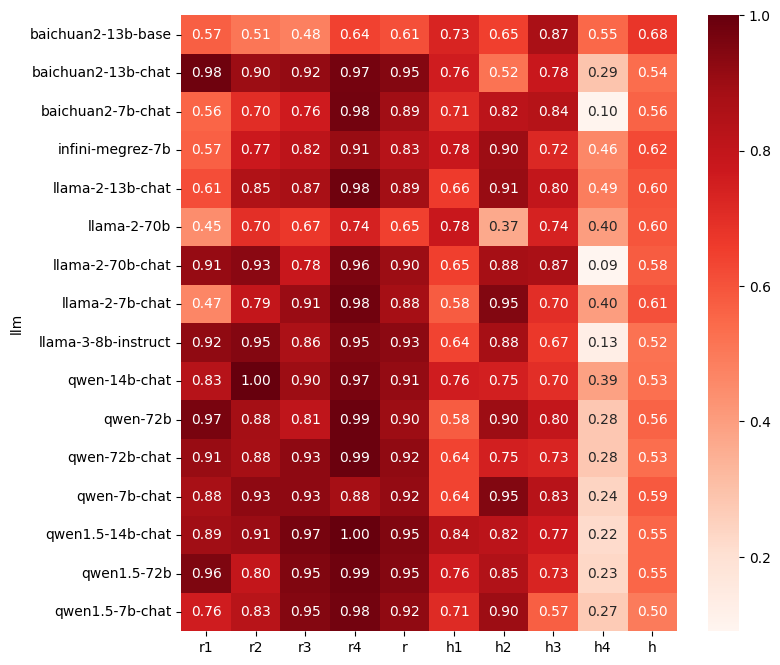

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(data=df.iloc[:,[0,1,2,3,8,4,5,6,7,10]], annot=True, fmt=".2f",cmap=plt.cm.Reds)

In [ ]:
# 定义颜色映射字典
color_map = {
    'baichuan2-13b-base':'pink', 
    'baichuan2-13b-chat':'pink', 
    'baichuan2-7b-chat':'pink',
    'infini-megrez-7b':'lavenderblush', 
    'llama-2-13b-chat':'gold', 
    'llama-2-70b':'gold',
    'llama-2-70b-chat':'gold', 
    'llama-2-7b-chat':'gold', 
    'llama-3-8b-instruct':'gold',
    'qwen-14b-chat':'skyblue', 
    'qwen-72b':'skyblue', 
    'qwen-72b-chat':'skyblue', 
    'qwen-7b-chat':'skyblue',
    'qwen1.5-14b-chat':'skyblue', 
    'qwen1.5-72b':'skyblue', 
    'qwen1.5-7b-chat':'skyblue'
}

In [ ]:
def picture(data,name,xlim1,xlim2):
    # 创建图
    fig, ax = plt.subplots()

    # 绘制条形图，根据类别名字设置颜色
    for val, cat in zip(data.values, data.index):
        ax.barh(cat, val, color=color_map[cat])
        
    # 绘制条形图，使用horizontal=True参数指示横向
    # bars = ax.barh(width=df.iloc[:,8].sort_values().values, y=df.iloc[:,8].sort_values().index, color='skyblue')

    # 在每个条形上添加数值标签
    for bar in ax.patches:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),  # 文本位置
                    xytext=(1, 1),  # 文本偏移量
                    textcoords='offset points',
                    ha='left', va='center')  # 水平和垂直对齐方式

    # 设置图形标题和坐标轴标签
    ax.set_title(name)
    # ax.set_xlabel('Value')
    # ax.set_ylabel('Categories')
    ax.set_xlim(xlim1,xlim2)

    # 显示图形
    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    plt.show()

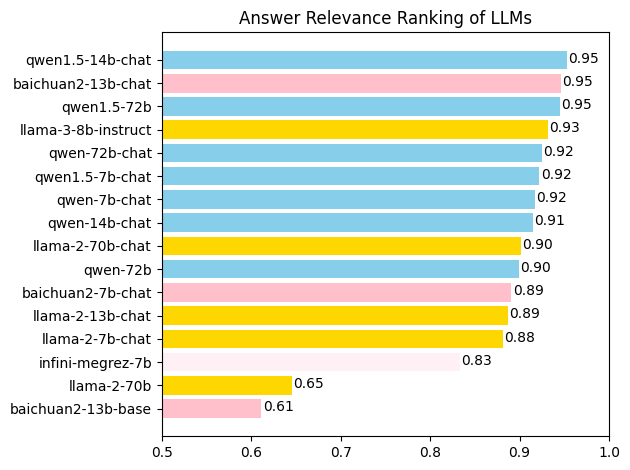

In [ ]:
picture(df.iloc[:,8].sort_values(),'Answer Relevance Ranking of LLMs',0.5,1)

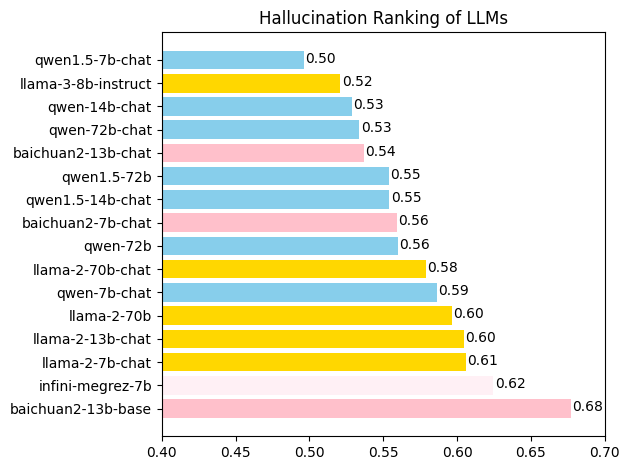

In [ ]:
picture(df.iloc[:,10].sort_values(ascending=False),'Hallucination Ranking of LLMs',0.4,0.7)

# Math401 Results View

In [26]:
b27c= pd.read_excel("./data/math401/all/classify/excel/baichuan2-7b-chat.xlsx")
b213b= pd.read_excel(r".\data\math401\all\classify\excel\baichuan2-13b-base.xlsx")
b213c= pd.read_excel(r".\data\math401\all\classify\excel\baichuan2-13b-chat.xlsx")
infi= pd.read_excel(r".\data\math401\all\classify\excel\infini-megrez-7b.xlsx")
l27c= pd.read_excel(r".\data\math401\all\classify\excel\llama-2-7b-chat.xlsx")
l213c= pd.read_excel(r".\data\math401\all\classify\excel\llama-2-13b-chat.xlsx")
q27c= pd.read_excel(r".\data\math401\all\classify\excel\qwen1.5-7b-chat.xlsx")
q214c= pd.read_excel(r".\data\math401\all\classify\excel\qwen1.5-14b-chat.xlsx")
q272= pd.read_excel(r".\data\math401\all\classify\excel\qwen1.5-72b.xlsx")
q272c= pd.read_excel(r".\data\math401\all\classify\excel\qwen1.5-72b-chat.xlsx")
q7c= pd.read_excel(r".\data\math401\all\classify\excel\qwen-7b-chat.xlsx")
q14c= pd.read_excel(r".\data\math401\all\classify\excel\qwen-14b-chat.xlsx")
q72= pd.read_excel(r".\data\math401\all\classify\excel\qwen-72b.xlsx")
q72c= pd.read_excel(r".\data\math401\all\classify\excel\qwen-72b-chat.xlsx")

In [27]:
dflist=[b27c,b213b,b213c,infi,l27c,l213c,q27c,q214c,q272,q272c,q7c,q14c,q72,q72c]

In [28]:
nlist=["baichuan2-7b-chat","baichuan2-13b-base","baichuan2-13b-chat","infini-megrez-7b","llama-2-7b-chat","llama-2-13b-chat","qwen1.5-7b-chat","qwen1.5-14b-chat","qwen1.5-72b","qwen1.5-72b-chat","qwen-7b-chat","qwen-14b-chat","qwen-72b","qwen-72b-chat"]
xlist=["欧拉方程","+-(10)","+-(100)","+-(1000)","+-(10^12)","+-(-10_10)","+-(-100_100,demical)","*(100)","*(10,demical)","*(10^5)","/(100)","**(10,2_4)","**(10,demical,2_4)","+-*(10,irrational)","+-*/()(100)","tri(sin,cos,tan)","log(2,e,10)"]

In [29]:
for df in dflist:
    df["Acc"]=df["TRUE"]/25
for df in dflist:
    df.iloc[0,4]=df.iloc[0,1]

In [51]:
df10=pd.DataFrame()
for i in range(14):
    df10[nlist[i]]=dflist[i]["Acc"]
df10.index=xlist
df10=df10.T
df11=df10.T
df11

,baichuan2-7b-chat,baichuan2-13b-base,baichuan2-13b-chat,infini-megrez-7b,llama-2-7b-chat,llama-2-13b-chat,qwen1.5-7b-chat,qwen1.5-14b-chat,qwen1.5-72b,qwen1.5-72b-chat,qwen-7b-chat,qwen-14b-chat,qwen-72b,qwen-72b-chat
欧拉方程,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00
+-(10),0.76,0.84,1.00,0.72,0.96,0.92,0.96,1.00,0.96,1.00,1.00,1.00,1.00,1.00
+-(100),0.56,0.80,0.92,0.48,1.00,0.96,0.92,1.00,0.96,1.00,0.84,1.00,1.00,1.00
+-(1000),0.76,0.72,0.96,0.52,0.76,0.88,0.92,1.00,0.88,0.92,0.76,0.96,0.96,1.00
+-(10^12),0.40,0.00,0.24,0.00,0.00,0.04,0.40,0.88,0.48,0.36,0.20,0.60,0.20,0.36
+-(-10_10),0.88,0.44,1.00,0.52,0.72,0.92,0.92,1.00,1.00,1.00,1.00,1.00,0.96,1.00
"+-(-100_100,demical)",0.60,0.44,0.84,0.28,0.40,0.68,0.96,0.92,0.88,1.00,0.96,0.92,0.88,0.96
*(100),0.60,0.44,0.68,0.16,0.28,0.40,0.76,0.88,0.88,0.88,0.76,0.88,0.96,0.96
"*(10,demical)",0.92,0.88,1.00,0.84,1.00,1.00,1.00,1.00,1.00,1.00,0.92,1.00,1.00,1.00
*(10^5),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00


In [33]:
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

In [34]:
df1=df10.iloc[:,1:5]
df1

,+-(10),+-(100),+-(1000),+-(10^12)
baichuan2-7b-chat,0.76,0.56,0.76,0.40
baichuan2-13b-base,0.84,0.80,0.72,0.00
baichuan2-13b-chat,1.00,0.92,0.96,0.24
infini-megrez-7b,0.72,0.48,0.52,0.00
llama-2-7b-chat,0.96,1.00,0.76,0.00
llama-2-13b-chat,0.92,0.96,0.88,0.04
qwen1.5-7b-chat,0.96,0.92,0.92,0.40
qwen1.5-14b-chat,1.00,1.00,1.00,0.88
qwen1.5-72b,0.96,0.96,0.88,0.48
qwen1.5-72b-chat,1.00,1.00,0.92,0.36


In [35]:
camp=plt.cm.Reds

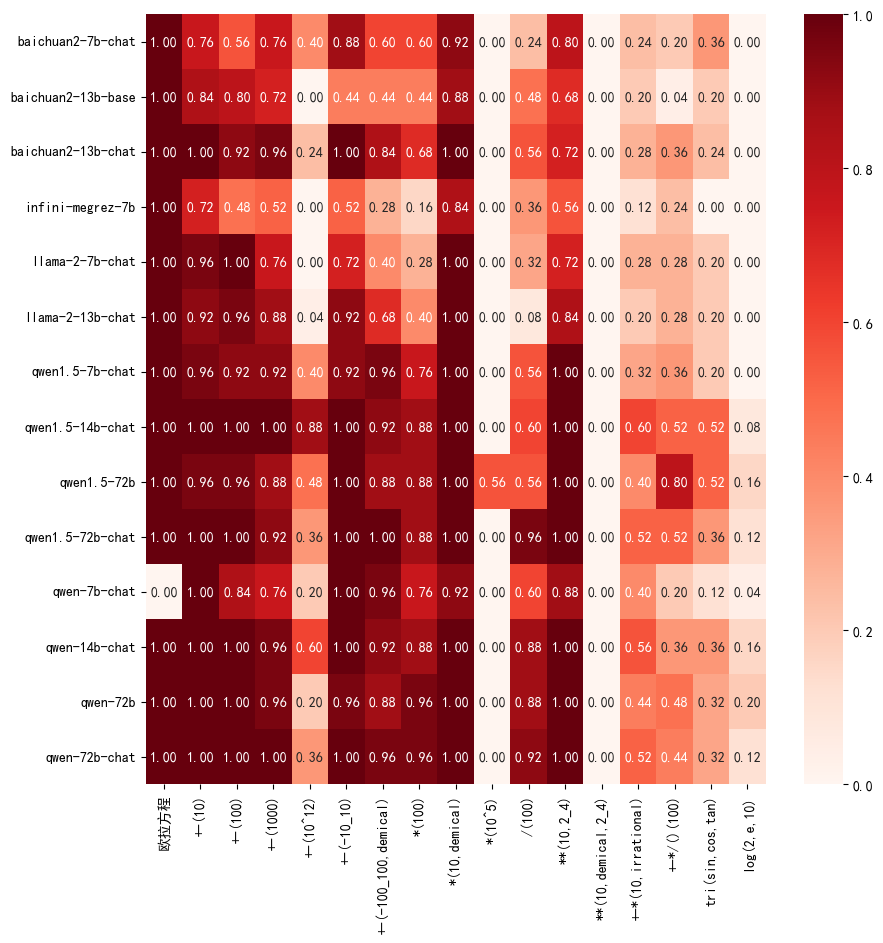

In [36]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data=df10, annot=True, fmt=".2f",cmap=plt.cm.Reds)
plt.savefig(r"./data/math401/results\heat.png")
plt.show()

In [37]:
df2=df11.iloc[:,[2,5,8]]
df2["tag"]=[3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,3,3]
df2

C:\Users\游锦亮\AppData\Local\Temp\ipykernel_24720\1357051100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tag"]=[3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,3,3]


,baichuan2-13b-chat,llama-2-13b-chat,qwen1.5-72b,tag
欧拉方程,1.00,1.00,1.00,3
+-(10),1.00,0.92,0.96,1
+-(100),0.92,0.96,0.96,1
+-(1000),0.96,0.88,0.88,1
+-(10^12),0.24,0.04,0.48,1
+-(-10_10),1.00,0.92,1.00,1
"+-(-100_100,demical)",0.84,0.68,0.88,1
*(100),0.68,0.40,0.88,2
"*(10,demical)",1.00,1.00,1.00,2
*(10^5),0.00,0.00,0.56,2


In [38]:
df21=df2.groupby("tag").mean()
df21

,baichuan2-13b-chat,llama-2-13b-chat,qwen1.5-72b
tag,,,
1,0.826667,0.733333,0.860000
2,0.560000,0.370000,0.750000
3,0.371429,0.360000,0.554286


In [39]:
Category=['A', 'B', 'C'] * 3,
Condition=['Cond1', 'Cond2', 'Cond3'] * 3,
Value=[10, 20, 30, 15, 25, 35, 12, 22, 32]

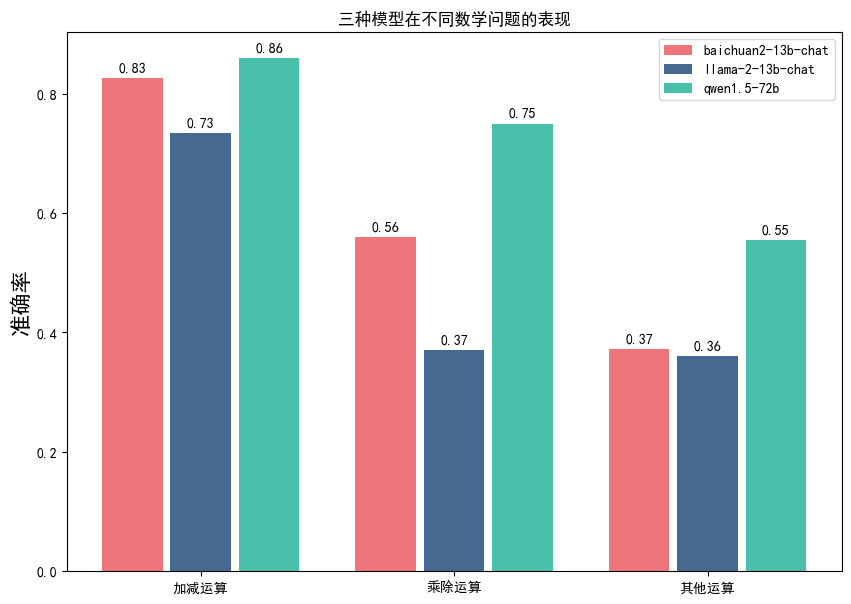

In [40]:

labels = ['加减运算', '乘除运算',"其他运算"]
a = df21.iloc[:,0]
b = df21.iloc[:,1]
c = df21.iloc[:,2]

x = np.arange(len(labels))  # 标签位置
width = 0.24 



fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width-0.03, a, width, label='baichuan2-13b-chat',color="#EE767A")
rects2 = ax.bar(x  , b, width, label='llama-2-13b-chat',color="#456990")
rects3 = ax.bar(x + width+ 0.03, c, width, label='qwen1.5-72b',color="#48C0AA")


# 为y轴、标题和x轴等添加一些文本。
ax.set_ylabel('准确率', fontsize=16)
ax.set_title('三种模型在不同数学问题的表现')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """在*rects*中的每个柱状条上方附加一个文本标签，显示其高度"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig(r"./data/math401/results\bar.png")
plt.show()


In [41]:
df4=df11.iloc[:,6:]
df4=df4.iloc[:,[2,3,1,0,6,7,5,4]]
df4

,qwen1.5-72b,qwen1.5-72b-chat,qwen1.5-14b-chat,qwen1.5-7b-chat,qwen-72b,qwen-72b-chat,qwen-14b-chat,qwen-7b-chat
欧拉方程,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
+-(10),0.96,1.00,1.00,0.96,1.00,1.00,1.00,1.00
+-(100),0.96,1.00,1.00,0.92,1.00,1.00,1.00,0.84
+-(1000),0.88,0.92,1.00,0.92,0.96,1.00,0.96,0.76
+-(10^12),0.48,0.36,0.88,0.40,0.20,0.36,0.60,0.20
+-(-10_10),1.00,1.00,1.00,0.92,0.96,1.00,1.00,1.00
"+-(-100_100,demical)",0.88,1.00,0.92,0.96,0.88,0.96,0.92,0.96
*(100),0.88,0.88,0.88,0.76,0.96,0.96,0.88,0.76
"*(10,demical)",1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.92
*(10^5),0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
df4=df4.iloc[1:,:]
df4["tag"]=[1,1,1,3,1,2,1,2,3,1,4,4,5,6,4,4]

C:\Users\游锦亮\AppData\Local\Temp\ipykernel_24720\4293910829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["tag"]=[1,1,1,3,1,2,1,2,3,1,4,4,5,6,4,4]


In [43]:
df41=df4.groupby("tag").mean()
df41

,qwen1.5-72b,qwen1.5-72b-chat,qwen1.5-14b-chat,qwen1.5-7b-chat,qwen-72b,qwen-72b-chat,qwen-14b-chat,qwen-7b-chat
tag,,,,,,,,
1,0.873333,0.96,0.913333,0.84,0.96,0.98,0.953333,0.826667
2,0.940000,1.00,0.960000,0.98,0.94,0.98,0.960000,0.940000
3,0.520000,0.18,0.440000,0.20,0.10,0.18,0.300000,0.100000
4,0.420000,0.37,0.400000,0.30,0.38,0.36,0.380000,0.260000
5,0.400000,0.52,0.600000,0.32,0.44,0.52,0.560000,0.400000
6,0.800000,0.52,0.520000,0.36,0.48,0.44,0.360000,0.200000


In [44]:
df41.index=["简单整数四则运算","含小数的四则运算","大数加减乘运算","指对幂运算与三角函数","含无理数的加减乘运算","带括号的长算式四则运算"]

In [45]:
clist=df41.columns.tolist()
clist

['qwen1.5-72b',
 'qwen1.5-72b-chat',
 'qwen1.5-14b-chat',
 'qwen1.5-7b-chat',
 'qwen-72b',
 'qwen-72b-chat',
 'qwen-14b-chat',
 'qwen-7b-chat']

In [46]:
dic4=df41.iloc[:,0].to_dict()
dic4

{'简单整数四则运算': 0.8733333333333334,
 '含小数的四则运算': 0.94,
 '大数加减乘运算': 0.52,
 '指对幂运算与三角函数': 0.42,
 '含无理数的加减乘运算': 0.4,
 '带括号的长算式四则运算': 0.8}

In [47]:
results=[df41.iloc[:,i].to_dict() for i in range(8)]
results

[{'简单整数四则运算': 0.8733333333333334,
  '含小数的四则运算': 0.94,
  '大数加减乘运算': 0.52,
  '指对幂运算与三角函数': 0.42,
  '含无理数的加减乘运算': 0.4,
  '带括号的长算式四则运算': 0.8},
 {'简单整数四则运算': 0.96,
  '含小数的四则运算': 1.0,
  '大数加减乘运算': 0.18,
  '指对幂运算与三角函数': 0.37,
  '含无理数的加减乘运算': 0.52,
  '带括号的长算式四则运算': 0.52},
 {'简单整数四则运算': 0.9133333333333334,
  '含小数的四则运算': 0.96,
  '大数加减乘运算': 0.44,
  '指对幂运算与三角函数': 0.4,
  '含无理数的加减乘运算': 0.6,
  '带括号的长算式四则运算': 0.52},
 {'简单整数四则运算': 0.84,
  '含小数的四则运算': 0.98,
  '大数加减乘运算': 0.2,
  '指对幂运算与三角函数': 0.3,
  '含无理数的加减乘运算': 0.32,
  '带括号的长算式四则运算': 0.36},
 {'简单整数四则运算': 0.96,
  '含小数的四则运算': 0.94,
  '大数加减乘运算': 0.1,
  '指对幂运算与三角函数': 0.38,
  '含无理数的加减乘运算': 0.44,
  '带括号的长算式四则运算': 0.48},
 {'简单整数四则运算': 0.98,
  '含小数的四则运算': 0.98,
  '大数加减乘运算': 0.18,
  '指对幂运算与三角函数': 0.36,
  '含无理数的加减乘运算': 0.52,
  '带括号的长算式四则运算': 0.44},
 {'简单整数四则运算': 0.9533333333333333,
  '含小数的四则运算': 0.96,
  '大数加减乘运算': 0.3,
  '指对幂运算与三角函数': 0.38,
  '含无理数的加减乘运算': 0.56,
  '带括号的长算式四则运算': 0.36},
 {'简单整数四则运算': 0.8266666666666667,
  '含小数的四则运算': 0.94,
  '大数加减乘运算': 0.1,
  '指对幂

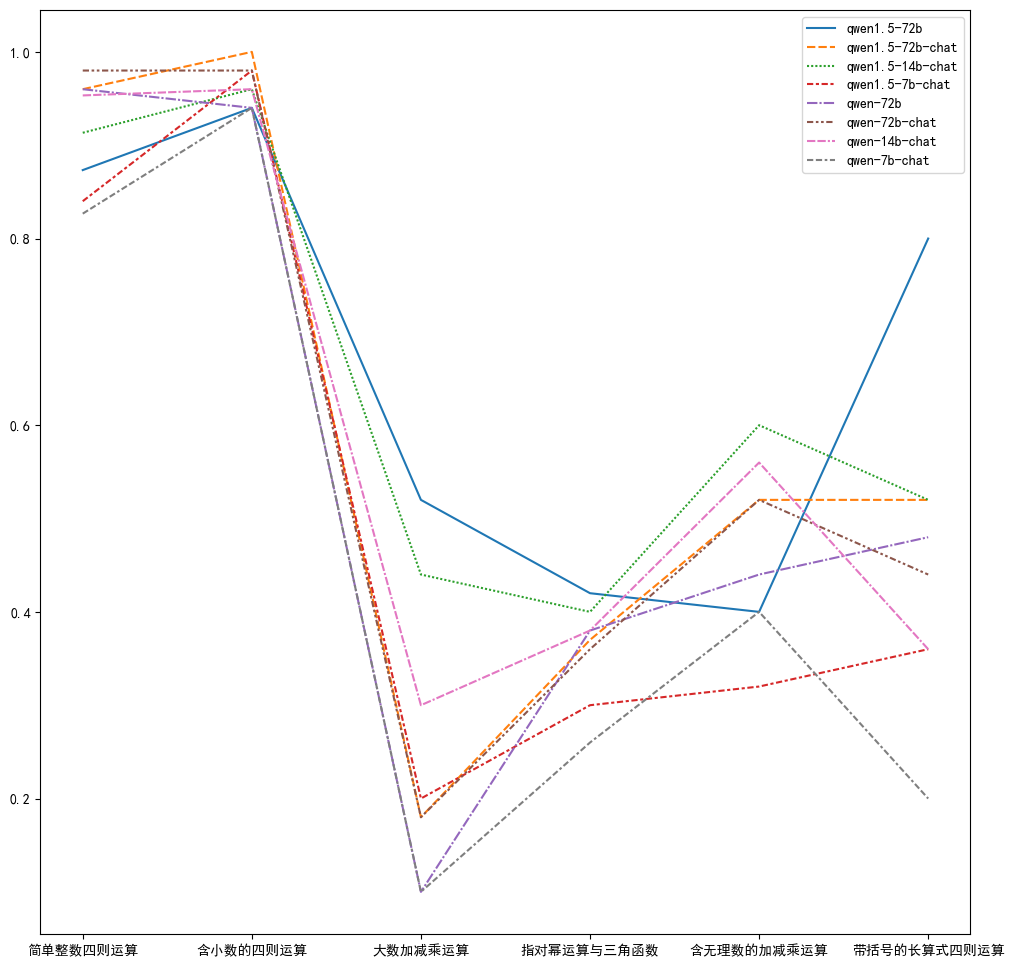

In [48]:
plt.figure(figsize=(12,12))
ax=sns.lineplot(data=df41)
plt.show()

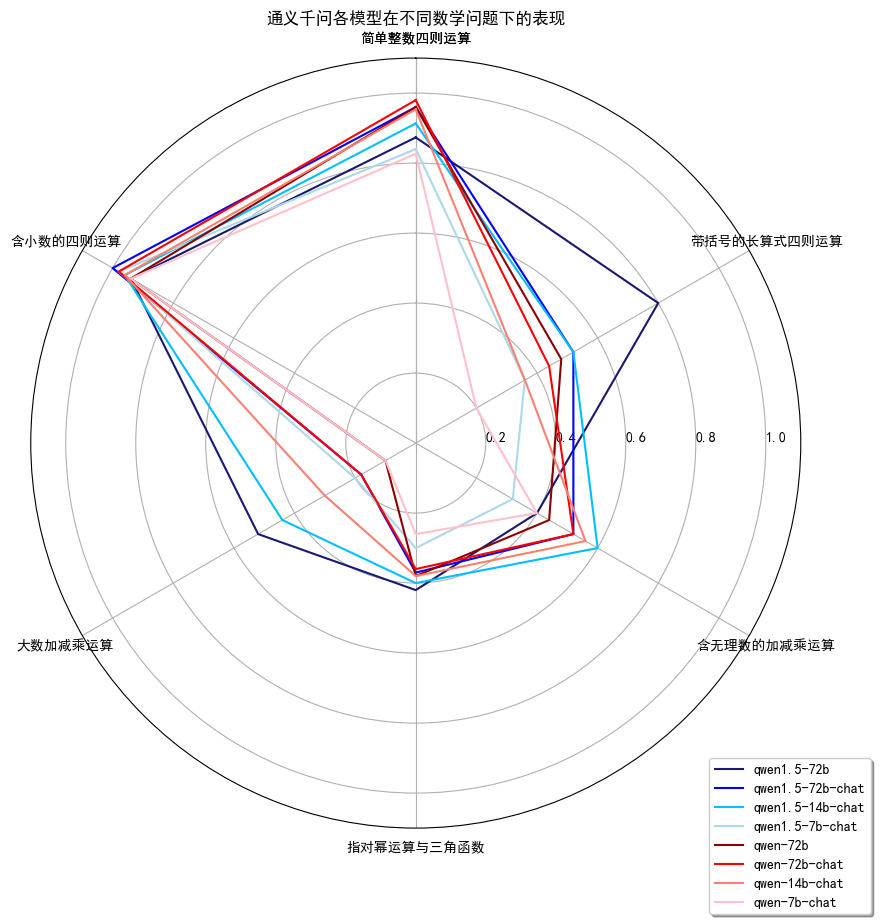

In [49]:
 

data_length = len(results[0])
# 将极坐标根据数据长度进行等分
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
# 使雷达图数据封闭
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
score_c = np.concatenate((score[2], [score[2][0]]))
score_d = np.concatenate((score[3], [score[3][0]]))
score_e = np.concatenate((score[4], [score[4][0]]))
score_f = np.concatenate((score[5], [score[5][0]]))
score_g = np.concatenate((score[6], [score[6][0]]))
score_h = np.concatenate((score[7], [score[7][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
# 设置图形的大小
fig = plt.figure(figsize=(10, 10))
# 新建一个子图
ax = plt.subplot(111, polar=True)

# 绘制雷达图
ax.plot(angles, score_a, color='midnightblue')
ax.plot(angles, score_b, color='blue')
ax.plot(angles, score_c, color='deepskyblue')
ax.plot(angles, score_d, color='lightblue')
ax.plot(angles, score_e, color='darkred')
ax.plot(angles, score_f, color='r')
ax.plot(angles, score_g, color='salmon')
ax.plot(angles, score_h, color='pink')
# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles*180/np.pi, labels)
# 设置雷达图的0度起始位置
ax.set_theta_zero_location('N')
# 设置雷达图的坐标刻度范围
ax.set_rlim(0, 1.1)
# 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_rlabel_position(270)
ax.set_title("通义千问各模型在不同数学问题下的表现")
plt.legend(clist, bbox_to_anchor=(1.1,0.1),fancybox=True,shadow=True)
plt.savefig(r"./data/math401/results\star.png")

plt.show()